## Dissertation Proof of Concept Code
### Wine quality dataset

In [1]:
#import all packages
%matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

Using matplotlib backend: MacOSX


In [2]:
# import the dataset, n = 1599
X = pd.read_csv("winequality-red.csv")
Y = X['quality']
X = X.drop(X.columns[11], axis=1)

In [3]:
# normalize the data 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [4]:
# Preforming Feature Selection
# first, test the correlation matrix and checking to see 
# if any features have a correlation greater than .9
corr = X.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
1,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
2,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
3,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
4,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
5,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
6,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
7,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
8,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
9,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [5]:
# adding a column for x0 for the intercept coefficient
x0 = np.ones((len(X),1))
X = np.hstack((x0, X))
X
X.shape

(1599, 12)

In [6]:
# backward feature selection
import statsmodels.formula.api as sm
numVars = len(X[0]) # number of features
rs = [] # list of R-sqaured values
numofatt = [] # list of number of attributes
names = ['x0', 'fixed_acidity', 'volatile_acid', 'citric_acid', 'residual_sugar', 
         'chlorides', 'free_sulfur_dixoide', 'total_sulfur_dioxide', 'density', 'pH', 
         'sulphates','alcohol']

for i in range(0, numVars):
    regressor_OLS = sm.OLS(Y, X).fit() # fitting OLS model
    regressor_OLS.summary(xname = names) # assigning names to the coefficents 
    maxp = max(regressor_OLS.pvalues) # find max p-value
    rs.append(regressor_OLS.rsquared) # make list of R2 values
    numofatt.append(len(X[0])) # make list of num of attributes
    for j in range(0, numVars - i):
        if (regressor_OLS.pvalues[j] == maxp):
            names.remove(names[j]) # removing the feature with the highest p-value from names
            X = np.delete(X, j, 1) # removing that feature from the dataframe
            print(names)

print(rs)
print(numofatt)

['x0', 'fixed_acidity', 'volatile_acid', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dixoide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dixoide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'citric_acid', 'chlorides', 'free_sulfur_dixoide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'chlorides', 'free_sulfur_dixoide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'chlorides', 'total_sulfur_dioxide', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'total_sulfur_dioxide', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'sulphates', 'alcohol']
['x0', 'volatile_acid', 'alcohol']
['x0', 'alcohol']
['x0']
[]
[0.36055170303893047, 0.3602764180297291, 0.36017280447160638, 0.35992650908873658, 0.3

/Users/LaurenVanValkenburg/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [7]:
# finding the optimal number of attributes based on the maximum R-squared value
best_equation = np.column_stack((rs,numofatt))
print(best_equation)
# find the minimum mse
m = np.argmax(best_equation[:,0])
num = best_equation[m,1]
print('The ideal number of features is:', num)

[[  3.60551703e-01   1.20000000e+01]
 [  3.60276418e-01   1.10000000e+01]
 [  3.60172804e-01   1.00000000e+01]
 [  3.59926509e-01   9.00000000e+00]
 [  3.59470916e-01   8.00000000e+00]
 [  3.57173648e-01   7.00000000e+00]
 [  3.51494239e-01   6.00000000e+00]
 [  3.43782426e-01   5.00000000e+00]
 [  3.35897316e-01   4.00000000e+00]
 [  3.17002433e-01   3.00000000e+00]
 [  2.26734368e-01   2.00000000e+00]
 [ -2.22044605e-16   1.00000000e+00]]
The ideal number of features is: 12.0


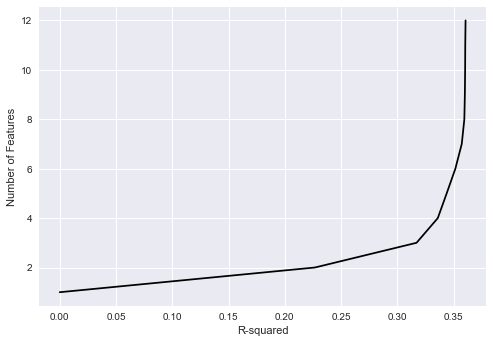

In [8]:
## graph the feature selection
x = rs
y = numofatt
plt.plot(x,y, 'k-')
plt.ylabel('Number of Features')
plt.xlabel('R-squared')
plt.show()

## ------------------------

In [9]:
# redo the dataset with the optimal number of attributes 
# (same because the optimal number is 12)
X = pd.read_csv("winequality-red.csv")
Y = X['quality']
X = X.drop(X.columns[11], axis=1)
# normalize the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
# adding a column for x0
x0 = np.ones((len(X),1))
X = np.hstack((x0, X))
X.shape

(1599, 12)

In [10]:
# ridge regression function to calculate weights and MSE value
def ridgeregression(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest) # convert to matricies
    n = len(xtrain.T*xtrain)
    I = np.identity(n) # creating an identity matrix
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T) # calculating the weights
    
    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return(what)

In [11]:
### CV - lambda on logarithmic scale
# grid search 1
from sklearn.model_selection import KFold 
kf = KFold(10,shuffle=False,random_state=42) # specifying 10 folds
kf
scores = []
for a in [10**a for a in range(-4,3)]: # user specified range of lambdas 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        # call ridge regression function
        score = ridgeregression(X_train, y_train, X_test, y_test, a) 
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in [10**a for a in range(-4,3)]: # user specified range of lambdas (needs to match above)
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.476399804081 0.0001
0.476399787053 0.001
0.476399616938 0.01
0.476397933211 0.1
0.476382798243 1
0.476367775471 10
0.478018000933 100
The best lambda value is: 10.0


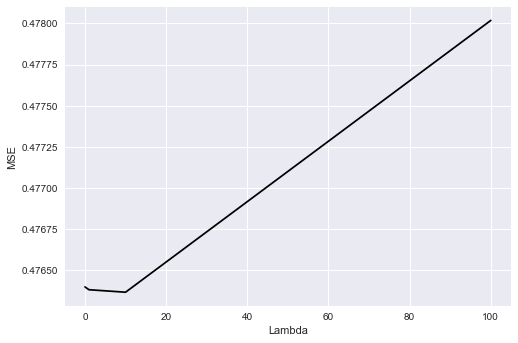

In [12]:
# graph of grid search 1
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')
plt.show()

In [13]:
### CV - lambda from 1 to 100, in jumps of 5
# same as above, but a new range of lambdas is tested
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(1,100,5):
    for train_index, test_index in kf.split(X): 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a)
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in range(1,100,5):
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.476382798243 1
0.476347912098 6
0.476377936448 11
0.476453090021 16
0.47655880408 21
0.476684170406 26
0.476820915202 31
0.476962700533 36
0.477104636529 41
0.477242933156 46
0.477374646732 51
0.477497492259 56
0.477609702333 61
0.477709919666 66
0.477797114205 71
0.477870518548 76
0.477929577127 81
0.47797390588 86
0.478003260003 91
0.478017507988 96
The best lambda value is: 6.0


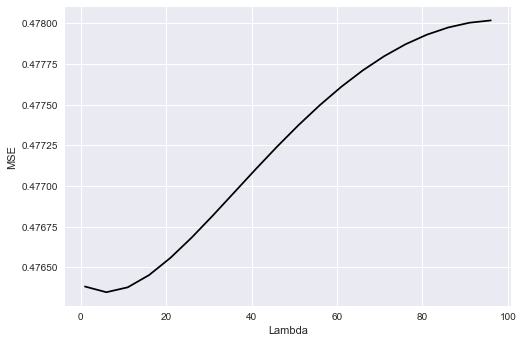

In [14]:
# graph of grid search 2
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')
plt.show()

In [15]:
### CV - lambda from 0 to 14
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(0,14):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a)
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in range(0,14):
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.476399805974 0
0.476382798243 1
0.476369447831 2
0.476359507439 3
0.476352746201 4
0.476348948366 5
0.476347912098 6
0.476349448405 7
0.476353380154 8
0.476359541178 9
0.476367775471 10
0.476377936448 11
0.476389886266 12
0.47640349521 13
The best lambda value is: 6.0


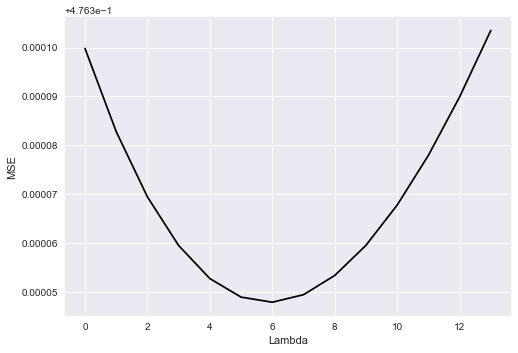

In [16]:
# graph of grid search 3
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')
plt.show()

In [47]:
# finding the coefficient values for the model
def ridgereg(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest)
    n = len(xtrain.T*xtrain)
    I = np.identity(n)
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T)
    
    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return((what,yhat))

In [48]:
# optimal lambda - 6
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(6,7):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        score = ridgereg(X_train, y_train, X_test, y_test, a)[0]
        scores.append(score[0]) #index from 0 to 11 to find coefficient for each feature
            
    scores = np.array(scores)
print(scores.mean())

5.52892825445


In [53]:
# ridge regression with lambda = 6
res = ridgereg(X_train, y_train, X_test, y_test, 6)

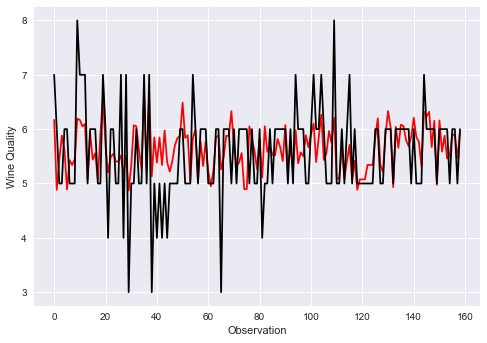

In [54]:
# graph RR
x = res[1]
y = y_test

t = range(len(y_test))

plt.plot(t, x, 'r') # plotting t, a separately 
plt.plot(t, y, 'k') # plotting t, b separately 
plt.xlabel('Observation')
plt.ylabel('Wine Quality')

plt.show()

In [55]:
# OLS with lambda = 0
resols = ridgereg(X_train, y_train, X_test, y_test, 0)

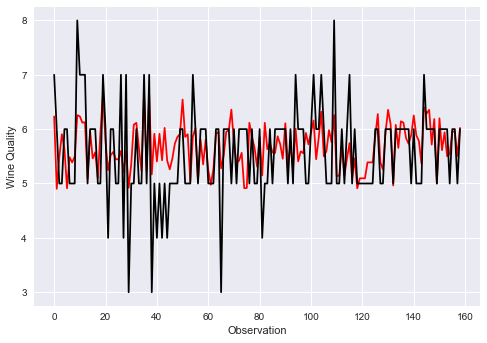

In [56]:
# graph OLS
x = resols[1]
y = y_test

t = range(len(y_test))

plt.plot(t, x, 'r') # plotting t, a separately 
plt.plot(t, y, 'k') # plotting t, b separately 
plt.xlabel('Observation')
plt.ylabel('Wine Quality')

plt.show()

## -------------------------

In [57]:
## Lasso Regression

In [58]:
## Lasso Regression
# redo the dataset with the optimal number of attributes 
# (same because the optimal number is 12)
X = pd.read_csv("winequality-red.csv")
Y = X['quality']
X = X.drop(X.columns[11], axis=1)
# normalize the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
#print(x)
X = pd.DataFrame(X)
# adding a column for x0
x0 = np.ones((len(X),1))
X = np.hstack((x0, X))
X
X.shape

(1599, 12)

In [59]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

In [60]:
### Lasso Regression
# grid search 1
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model
#setting cross-validation to 10
lasso = linear_model.LassoCV(alphas = [.0001,.001,.01,.1,1,10,100], cv=10) 
lasso.fit(X_train, y_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.01
[[ 0.7741466   0.63147225  0.72612825  0.69773825  0.57613412  0.71771425
   0.64480916  0.64091284  0.55747994  0.66655911]
 [ 0.7741466   0.63147225  0.72612825  0.69773825  0.57613412  0.71771425
   0.64480916  0.64091284  0.55747994  0.66655911]
 [ 0.7741466   0.63147225  0.72612825  0.69773825  0.57613412  0.71771425
   0.64480916  0.64091284  0.55747994  0.66655911]
 [ 0.60201579  0.47414519  0.51215719  0.58124547  0.44278413  0.4857442
   0.48513478  0.46825376  0.34260166  0.45149234]
 [ 0.53069344  0.43876408  0.44950584  0.56536201  0.42898532  0.41388506
   0.48644241  0.40502065  0.27598075  0.40141841]
 [ 0.52526727  0.44639773  0.4468004   0.55983521  0.43295531  0.41260891
   0.49414867  0.40637655  0.27476444  0.3996665 ]
 [ 0.52518237  0.44777252  0.44543002  0.55913487  0.43371245  0.41296243
   0.49463829  0.40650346  0.27455587  0.39919558]]


In [62]:
# grid search 2
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model
lasso = linear_model.LassoCV(alphas = [.01,.02,.03,.04], cv=10) #setting cross-validation to 10
lasso.fit(X_train, y_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.01
[[ 0.5500388   0.44297052  0.46523865  0.5707394   0.42560995  0.42951968
   0.47586666  0.4160385   0.28928386  0.40534128]
 [ 0.54266384  0.44119339  0.46064046  0.57076431  0.42592484  0.42332324
   0.47817573  0.41101942  0.28332722  0.40284772]
 [ 0.53510032  0.43890296  0.45480679  0.57001324  0.42717258  0.41804726
   0.48120814  0.40698287  0.27902216  0.40176081]
 [ 0.53067958  0.43876444  0.44950525  0.56536175  0.42898513  0.41388296
   0.48644325  0.40502165  0.2759808   0.40141833]]


In [63]:
lst = [ 0.5500388,   0.44297052,  0.46523865,  0.5707394,   0.42560995,  0.42951968,
   0.47586666,  0.4160385,   0.28928386,  0.40534128]
np.average(lst) # finding the average MSE for lambda 0.01

0.44706473000000002

In [65]:
lasso0001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(np.sum(lasso0001.coef_ != 0)) # finding the number of features kept in the model
print(lasso0001.coef_ != 0) # finding the actual features kept in the model
print(lasso0001.coef_) # finding the coefficient values

7
[False False  True False False  True  True  True False  True  True  True]
[ 0.          0.         -0.23798925  0.          0.         -0.03423135
  0.02126756 -0.10845945 -0.         -0.05245738  0.1358176   0.45921464]


### ---------------------------------